In [139]:
import tensorflow as tf
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import opendatasets as ods

In [140]:
dataset = pd.read_csv('diabetes.csv')

In [141]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [142]:
# sns.pairplot(dataset)

In [143]:
#No NA element!
dataset.isna().values.any()

False

In [144]:
outcome = dataset['Outcome']
dataset = dataset.loc[:, dataset.columns != 'outcome']

In [179]:
train, test, trainY, testY = train_test_split(dataset, outcome, test_size = 0.2, train_size = 0.8)

In [180]:
train.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,3.928339,120.817590,69.045603,21.013029,79.785016,31.727850,0.472117,33.511401,0.342020
std,3.440202,32.091976,19.541261,15.988571,114.534063,7.851104,0.338458,11.952968,0.474773
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.500000,0.000000,0.000000,27.025000,0.245000,24.000000,0.000000
50%,3.000000,116.500000,72.000000,23.000000,38.500000,31.950000,0.369000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,125.000000,36.500000,0.629000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,59.400000,2.420000,81.000000,1.000000


In [181]:
trainY = train.pop('Outcome')
testY = test.pop('Outcome')

trainX = train
testX = test

# scaler = preprocessing.MinMaxScaler()
# trainX = scaler.fit_transform(train)
# testX = scaler.transform(test)


In [182]:
print(trainX.shape)

(614, 8)


In [183]:
print(trainX)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
732            2      174             88             37      120  44.5   
29             5      117             92              0        0  34.1   
120            0      162             76             56      100  53.2   
351            4      137             84              0        0  31.2   
83             0      101             65             28        0  24.6   
..           ...      ...            ...            ...      ...   ...   
661            1      199             76             43        0  42.9   
255            1      113             64             35        0  33.6   
638            7       97             76             32       91  40.9   
715            7      187             50             33      392  33.9   
653            2      120             54              0        0  26.8   

     DiabetesPedigreeFunction  Age  
732                     0.646   24  
29                      0.337   38  


In [184]:
#logreg
logreg = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])
logreg.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01), 
    loss = 'binary_crossentropy',
    metrics = ['accuracy', 'mse']
)

In [185]:
history = logreg.fit(trainX, trainY, 
                    batch_size = 64, 
                    epochs = 500, 
                    callbacks = [tf.keras.callbacks.EarlyStopping(patience = 100)], 
                    validation_data=[testX, testY],
                    validation_batch_size = 32)

Epoch 1/500
10/10 [==============================] - 0s 17ms/step - loss: 33.1956 - accuracy: 0.6531 - mse: 0.3464 - val_loss: 30.6269 - val_accuracy: 0.6169 - val_mse: 0.3829
Epoch 2/500
10/10 [==============================] - 0s 5ms/step - loss: 24.7830 - accuracy: 0.6221 - mse: 0.3739 - val_loss: 24.8120 - val_accuracy: 0.5909 - val_mse: 0.4095
Epoch 3/500
10/10 [==============================] - 0s 4ms/step - loss: 20.9707 - accuracy: 0.5700 - mse: 0.4196 - val_loss: 21.1160 - val_accuracy: 0.5519 - val_mse: 0.4370
Epoch 4/500
10/10 [==============================] - 0s 4ms/step - loss: 17.7879 - accuracy: 0.5472 - mse: 0.4440 - val_loss: 17.4928 - val_accuracy: 0.5584 - val_mse: 0.4302
Epoch 5/500
10/10 [==============================] - 0s 5ms/step - loss: 14.4770 - accuracy: 0.5505 - mse: 0.4375 - val_loss: 14.1653 - val_accuracy: 0.5455 - val_mse: 0.4466
Epoch 6/500
10/10 [==============================] - 0s 4ms/step - loss: 11.4079 - accuracy: 0.5537 - mse: 0.4250 - val_loss

In [186]:
def history_plotter(history):
    '''Plots training information over epochs
    Arguments: 1) history: history data obtained after training
    Returns: None
    '''
    epochs = len(history.epoch)
    epoch_range = range(epochs)
    train_acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']

    plt.figure(figsize = (16, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epoch_range, train_acc, label = 'Training Accuracy')
    plt.plot(epoch_range, val_acc, label = "Validation Accuracy")
    plt.legend(loc = "lower right")

    plt.subplot(1, 2, 2)
    plt.plot(epoch_range, train_loss, label = "Training Loss")
    plt.plot(epoch_range, val_loss, label = "Validation Loss")
    plt.legend(loc = "lower right")
    plt.show()

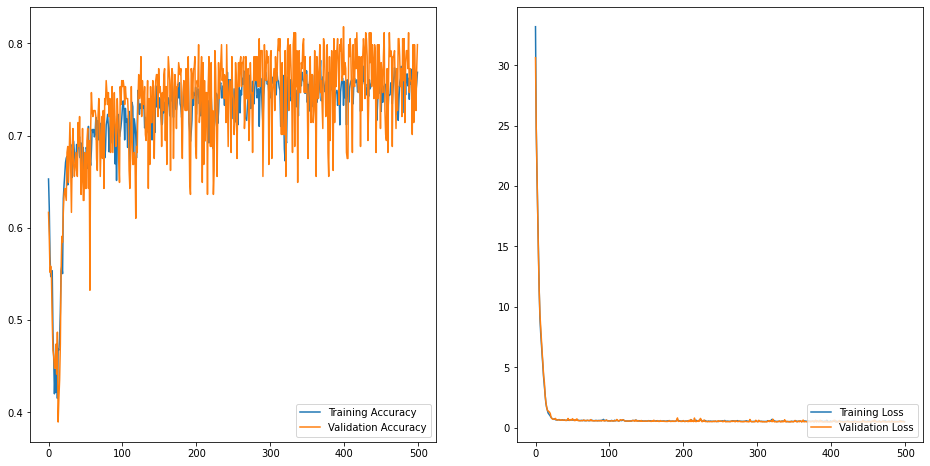

In [187]:
history_plotter(history)

In [188]:
#deep neural network

dnn = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(256, activation = 'relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

dnn.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss = 'binary_crossentropy',
    metrics = ['accuracy', 'mse']
)

In [189]:
history = dnn.fit(trainX, trainY, 
                    batch_size = 64, 
                    epochs = 500, 
                    #callbacks = [tf.keras.callbacks.EarlyStopping(patience = 100)], 
                    validation_data=[testX, testY],
                    validation_batch_size = 32
)

Epoch 1/500
10/10 [==============================] - 1s 63ms/step - loss: 4.0829 - accuracy: 0.5554 - mse: 0.4059 - val_loss: 1.5596 - val_accuracy: 0.6169 - val_mse: 0.3364
Epoch 2/500
10/10 [==============================] - 0s 7ms/step - loss: 1.6862 - accuracy: 0.5782 - mse: 0.3543 - val_loss: 0.7708 - val_accuracy: 0.6818 - val_mse: 0.2329
Epoch 3/500
10/10 [==============================] - 0s 7ms/step - loss: 1.4075 - accuracy: 0.5945 - mse: 0.3296 - val_loss: 0.6155 - val_accuracy: 0.6299 - val_mse: 0.2090
Epoch 4/500
10/10 [==============================] - 0s 7ms/step - loss: 1.0152 - accuracy: 0.5782 - mse: 0.3003 - val_loss: 0.6229 - val_accuracy: 0.6753 - val_mse: 0.2075
Epoch 5/500
10/10 [==============================] - 0s 6ms/step - loss: 0.9264 - accuracy: 0.6107 - mse: 0.2775 - val_loss: 0.7356 - val_accuracy: 0.6818 - val_mse: 0.2441
Epoch 6/500
10/10 [==============================] - 0s 6ms/step - loss: 1.0913 - accuracy: 0.5977 - mse: 0.3024 - val_loss: 0.7873 - 

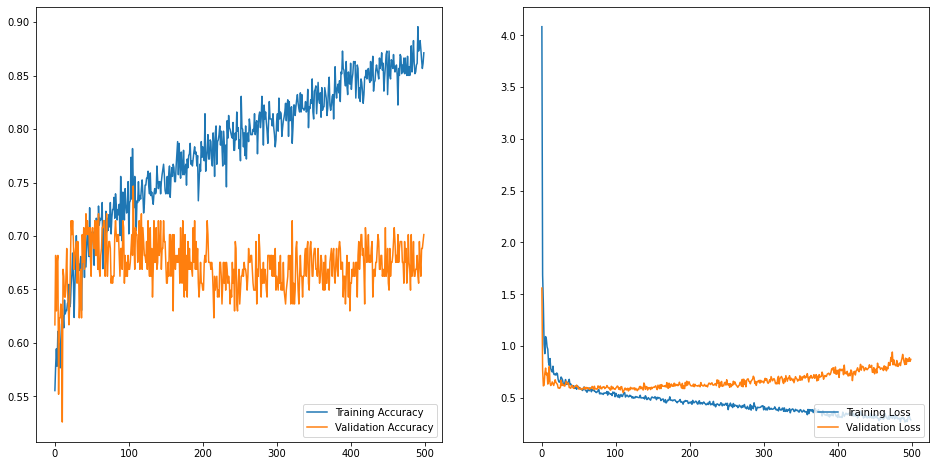

In [190]:
history_plotter(history)

In [195]:
#cnn
cnn = tf.keras.Sequential([
    tf.keras.layers.Conv1D(32, 3, activation = 'relu', input_shape = (trainX.shape[1], 1), padding = 'same'),
    tf.keras.layers.MaxPool1D(2),
    tf.keras.layers.Conv1D(64, 3, activation = 'relu', padding = 'same'),
    tf.keras.layers.MaxPool1D(4),


    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(256, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

cnn.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss = 'binary_crossentropy',
    metrics = ['accuracy', 'mse']
)

Epoch 1/500
10/10 [==============================] - 1s 28ms/step - loss: 1.9628 - accuracy: 0.5195 - mse: 0.3803 - val_loss: 0.9512 - val_accuracy: 0.6299 - val_mse: 0.2976
Epoch 2/500
10/10 [==============================] - 0s 7ms/step - loss: 1.1494 - accuracy: 0.5896 - mse: 0.3060 - val_loss: 0.9633 - val_accuracy: 0.3961 - val_mse: 0.3520
Epoch 3/500
10/10 [==============================] - 0s 7ms/step - loss: 0.9314 - accuracy: 0.5765 - mse: 0.2972 - val_loss: 0.7196 - val_accuracy: 0.5974 - val_mse: 0.2472
Epoch 4/500
10/10 [==============================] - 0s 7ms/step - loss: 0.7131 - accuracy: 0.6042 - mse: 0.2479 - val_loss: 0.6715 - val_accuracy: 0.6494 - val_mse: 0.2309
Epoch 5/500
10/10 [==============================] - 0s 7ms/step - loss: 0.6966 - accuracy: 0.6156 - mse: 0.2447 - val_loss: 0.6754 - val_accuracy: 0.6169 - val_mse: 0.2372
Epoch 6/500
10/10 [==============================] - 0s 7ms/step - loss: 0.7007 - accuracy: 0.6368 - mse: 0.2402 - val_loss: 0.6656 - 

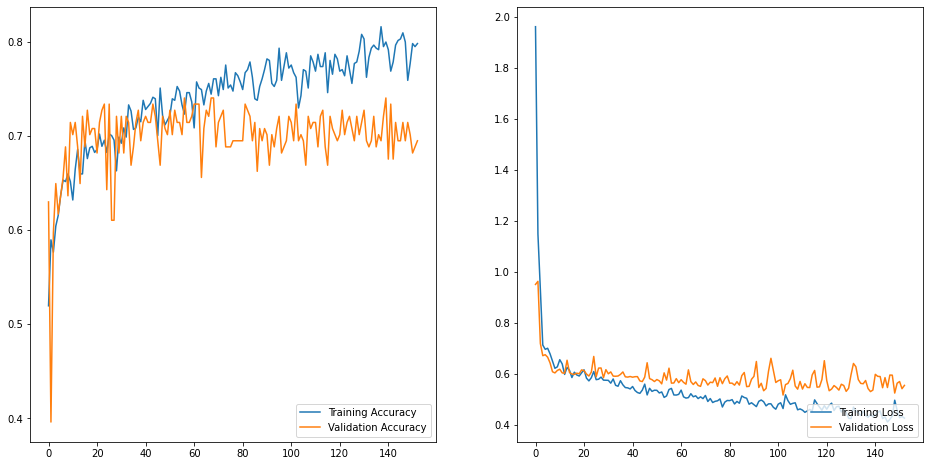

In [196]:
history = cnn.fit(trainX, trainY, 
                    batch_size = 64, 
                    epochs = 500, 
                    callbacks = [tf.keras.callbacks.EarlyStopping(patience = 50)], 
                    validation_data=[testX, testY],
                    validation_batch_size = 32
)
history_plotter(history)